# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [244]:
! pip install citipy

In [264]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [265]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [266]:
#sample city
citys = ["ostrovnoy","mahebourg","qaanaaq","zhuhai","flinders","cape town"]
citys

['ostrovnoy', 'mahebourg', 'qaanaaq', 'zhuhai', 'flinders', 'cape town']

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [276]:
url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key + "&q="
responses=[]
city_list=[]
for city in cities:
    city_data = requests.get(url + city).json()
    responses.append(city_data)
    city_list.append(responses["main"]["name"])

city_list
#responses

TypeError: list indices must be integers or slices, not str

## Convert Raw Data to DataFrame
* Save as csv

In [249]:
lat = []
lng=[]
Max_Temp = []
Cloudiness=[]
Humidity=[]
Wind_Speed=[]
country=[]
date=[]

for city in cities:
    response = requests.get(url + city).json()
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    Max_Temp.append(response['main']['temp_max'])
    Cloudiness.append(response['clouds']['all'])
    Humidity.append(response['main']['humidity'])
    Wind_Speed.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])

#time.sleep(1)
weather_dict = {
    "city": citys,
    "lat": lat,
    "lng":lng,
    "Max_Temp":Max_Temp,
    "Cloudiness":Cloudiness,
    "Humidity":Humidity,
    "Wind_Speed": Wind_Speed,
    "country":country,
    "date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
0,ostrovnoy,68.05,39.51,272.78,2,90,0.64,RU,1602973344
1,mahebourg,-20.41,57.70,295.15,20,83,1.50,MU,1602973130
2,qaanaaq,77.48,-69.36,274.58,100,87,3.85,GL,1602973345
3,zhuhai,22.28,113.57,296.15,81,78,8.20,CN,1602973345
4,flinders,-34.58,150.86,293.71,100,73,0.89,AU,1602973345


In [250]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

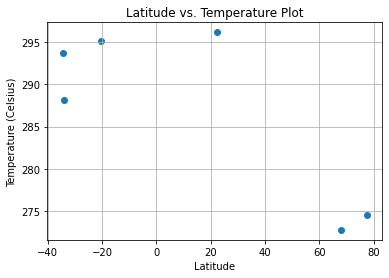

In [251]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Max_Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Temperature.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has lower temperature than the Southern Hemisphere.

### Latitude vs. Humidity Plot

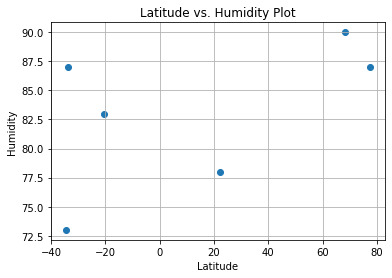

In [252]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Humidity with the Southern Hemisphere.

### Latitude vs. Cloudiness Plot

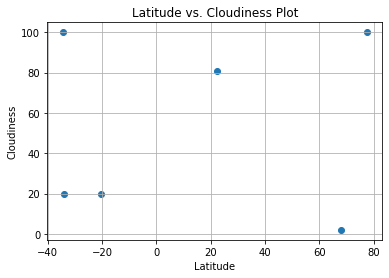

In [253]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Cloudiness with the Southern Hemisphere.

### Latitude vs. Wind Speed Plot

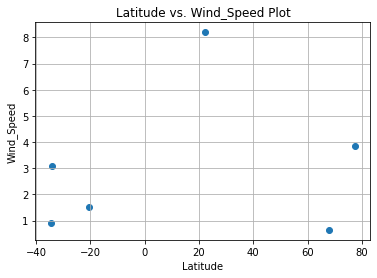

In [254]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind_Speed Plot")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind_Speed.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Wind Speed with the Southern Hemisphere.

## Linear Regression

### Write linear regression plot function (optional)

In [255]:
weather_dataN = weather_data[weather_data['lat']>=0]
weather_dataS =weather_data[weather_data['lat']<0]
weather_dataN

,city,lat,lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
0,ostrovnoy,68.05,39.51,272.78,2,90,0.64,RU,1602973344
2,qaanaaq,77.48,-69.36,274.58,100,87,3.85,GL,1602973345
3,zhuhai,22.28,113.57,296.15,81,78,8.20,CN,1602973345


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.9481870100319062


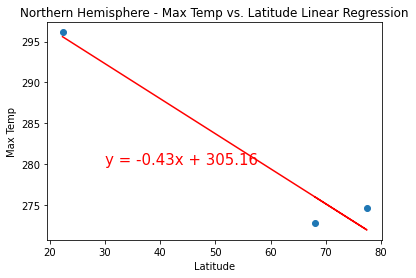

In [256]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values1 = weather_dataN['lat'].astype('float')
y_values1 = weather_dataN['Max_Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values1,y_values1)

# Plot regression line
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq,(30,280),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude.png")

# Show plot
plt.show()

## There is a moderate negative relaltionship between max temp and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.39439480165088925


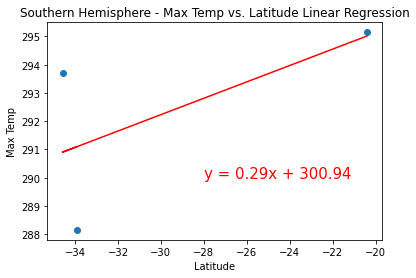

In [257]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values2 = weather_dataS['lat'].astype('float')
y_values2 = weather_dataS['Max_Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values2,y_values2)

# Plot regression line
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq,(-28,290),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude.png")

# Show plot
plt.show()

## There is a strong postive relaltionship between max temp and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.8462398071983235


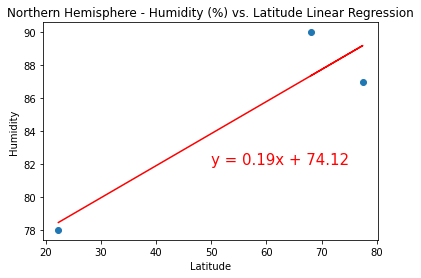

In [258]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values3 = weather_dataN['lat'].astype('float')
y_values3 = weather_dataN['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values3,y_values3)

# Plot regression line
plt.plot(x_values3,regress_values3,"r-")
plt.annotate(line_eq,(50,82),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity vs. Latitude.png")

# Show plot
plt.show()

## There is almost no relaltionship between Humidity (%) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.07808088399585626


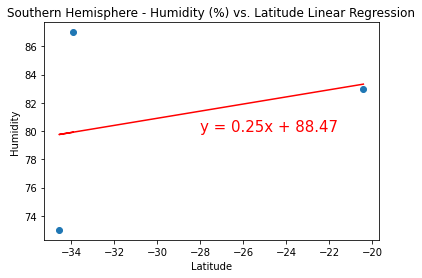

In [259]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values4 = weather_dataS['lat'].astype('float')
y_values4 = weather_dataS['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values4,y_values4)

# Plot regression line
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq,(-28,80),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Humidity (%) and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03183964550404358


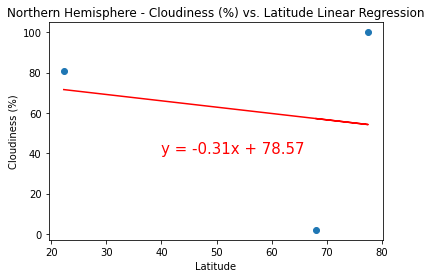

In [260]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values5 = weather_dataN['lat'].astype('float')
y_values5 = weather_dataN['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
regress_values5 = x_values5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values5,y_values5)

# Plot regression line
plt.plot(x_values5,regress_values5,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()

## There is almost no relaltionship between Cloudiness (%) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.28597834697649854


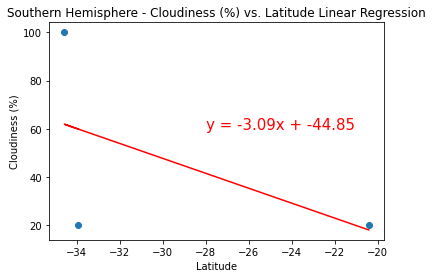

In [261]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values6 = weather_dataS['lat'].astype('float')
y_values6 = weather_dataS['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
regress_values6 = x_values6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values6,y_values6)

# Plot regression line
plt.plot(x_values6,regress_values6,"r-")
plt.annotate(line_eq,(-28,60),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Cloudiness (%)  and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.6838498549944585


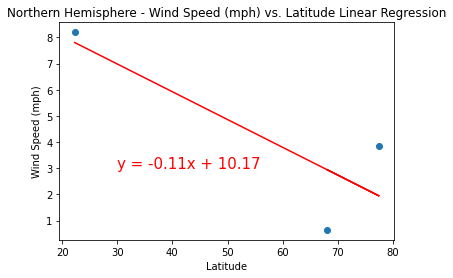

In [262]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values7 = weather_dataN['lat'].astype('float')
y_values7 = weather_dataN['Wind_Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
regress_values7 = x_values7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values7,y_values7)

# Plot regression line
plt.plot(x_values7,regress_values7,"r-")
plt.annotate(line_eq,(30,3),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()

## There is a little postive relaltionship between Wind Speed (mph) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.044460096273002465


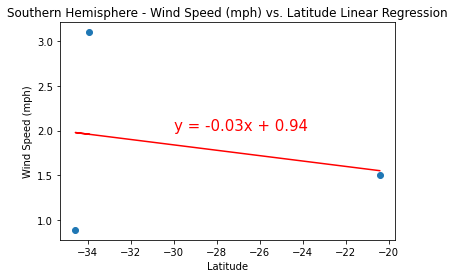

In [263]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values8 = weather_dataS['lat'].astype('float')
y_values8 = weather_dataS['Wind_Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)
regress_values8 = x_values8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values8, y_values8)

# Plot regression line
plt.plot(x_values8,regress_values8,"r-")
plt.annotate(line_eq,(-30,2),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Wind Speed (mph) and latitude in the Southern Hemisphere.